### RougeScore1 of 1000 samples

In [50]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [51]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')        
from config import *

In [52]:
model_params = model_params
EPOCH = model_params['TRAIN_EPOCHS']
model = model_params['MODEL']
data = data
print(model_params)
print(data)

{'MODEL': 't5-small', 'TRAIN_BATCH_SIZE': 16, 'VALID_BATCH_SIZE': 16, 'TRAIN_EPOCHS': 20, 'VAL_EPOCHS': 1, 'LEARNING_RATE': 2e-05, 'SCHEDULER': 'linear', 'MAX_SOURCE_TEXT_LENGTH': 512, 'MAX_TARGET_TEXT_LENGTH': 36, 'SEED': 42}
xsum


#### max 512 tokens
##### AVERAGE

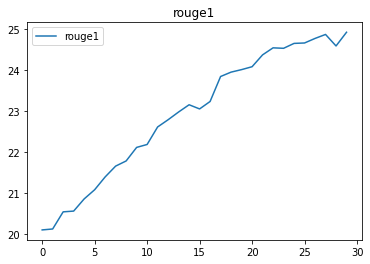

In [72]:
path = f"""../model/{model_params["MODEL"]}_{data}_lenrestriction_30epoch"""

from score import  RougeScore
model = "t5-small"
dataset = "xsum"
rougescore = RougeScore(model = "t5-small", dataset = "xsum", EPOCH = 30, path = path)
rouge1_512 = rougescore.getscore_ave()["rouge1"]
rougescore.plot(rouge1_512, "rouge1")

##### PER DOC

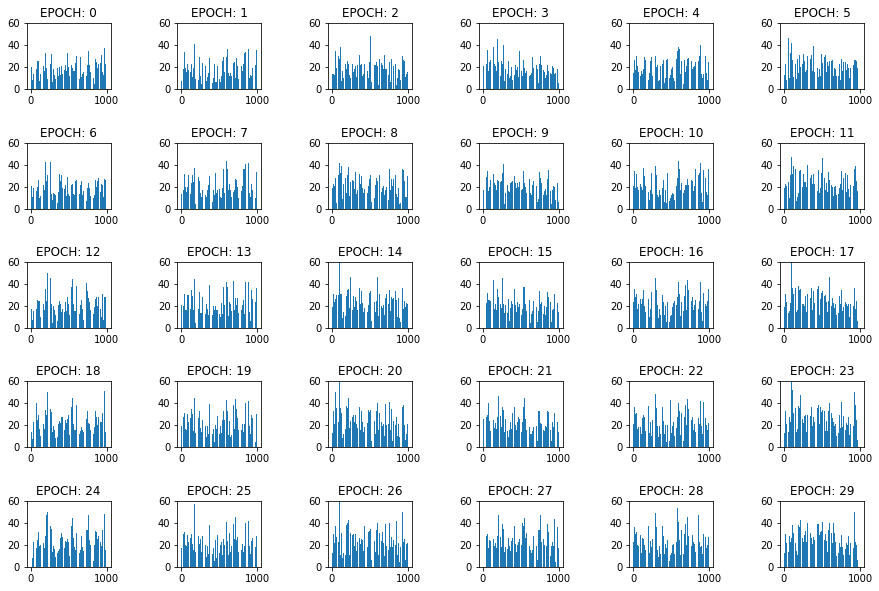

In [69]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
EPOCH = 30 
for epoch in range(0,EPOCH):
    ax = fig.add_subplot(5, 6, epoch + 1)
    path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{epoch}.csv")
    df = pd.read_csv(path_df)
    ax.bar(range(len(df['ids'])), df['RougeScore1'])
    ax.set_title(f"EPOCH: {epoch}")
    ax.set_ylim([0,60])

In [102]:
def dev(n):
    scores = []
    for epoch in range(EPOCH):
        path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{epoch}.csv")
        df = pd.read_csv(path_df)
        _id = df['ids'][n]
        scores.append(df['RougeScore1'][df['ids']==_id])
    return scores

#### Rouge1

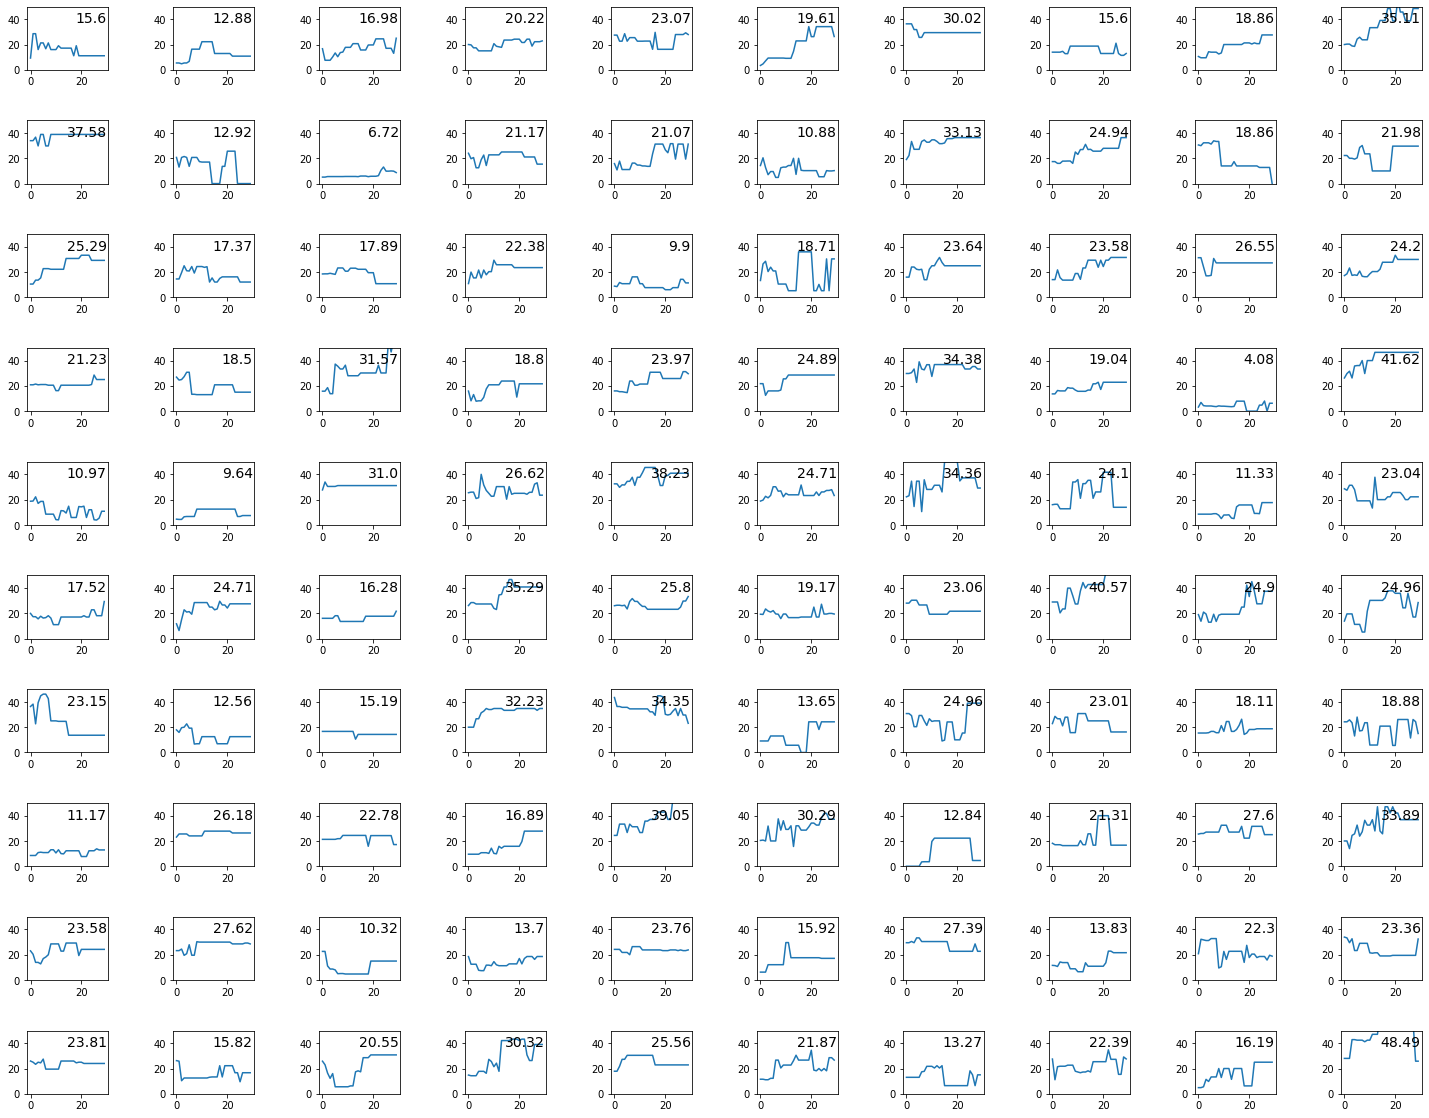

In [103]:
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

for n in range(0,100):
    ax = fig.add_subplot(10, 10, n + 1)
    scores = dev(n)
    ax.plot(scores)
    ax.text(30, 35, str(np.round(np.mean(scores),2)),
         fontsize=14, weight = 'medium', ha='right', va = 'bottom')
    ax.set_ylim([0,50])  

#### RougeL

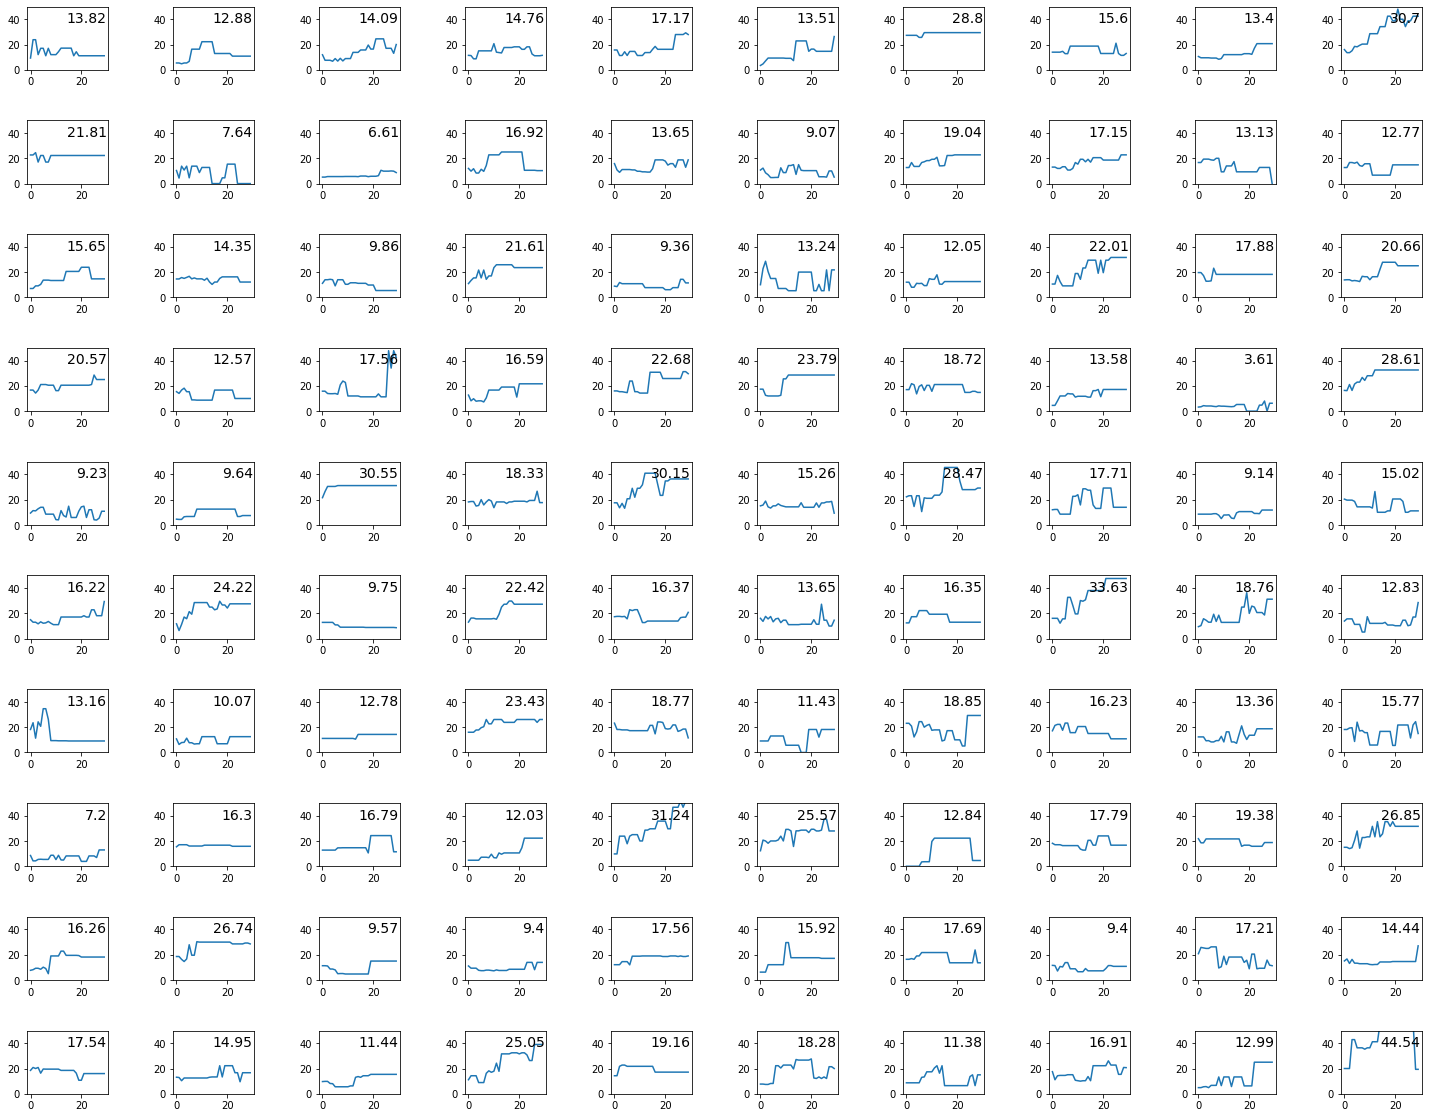

In [101]:
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

for n in range(0,100):
    ax = fig.add_subplot(10, 10, n + 1)
    scores = dev(n)
    ax.plot(scores)
    ax.text(30, 35, str(np.round(np.mean(scores),2)),
         fontsize=14, weight = 'medium', ha='right', va = 'bottom')
    ax.set_ylim([0,50])   

#### no length restriction

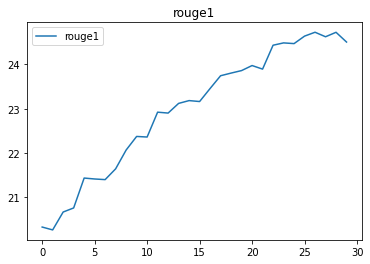

In [109]:
path = f"""../model/{model_params["MODEL"]}_{data}_nolenrestriction_30epoch"""
model = "t5-small"
dataset = "xsum"
rougescore = RougeScore(model = "t5-small", dataset = "xsum", EPOCH = 30, path = path)
rouge1 = rougescore.getscore_ave()["rouge1"]
rougescore.plot(rouge1, "rouge1")

#### per doc

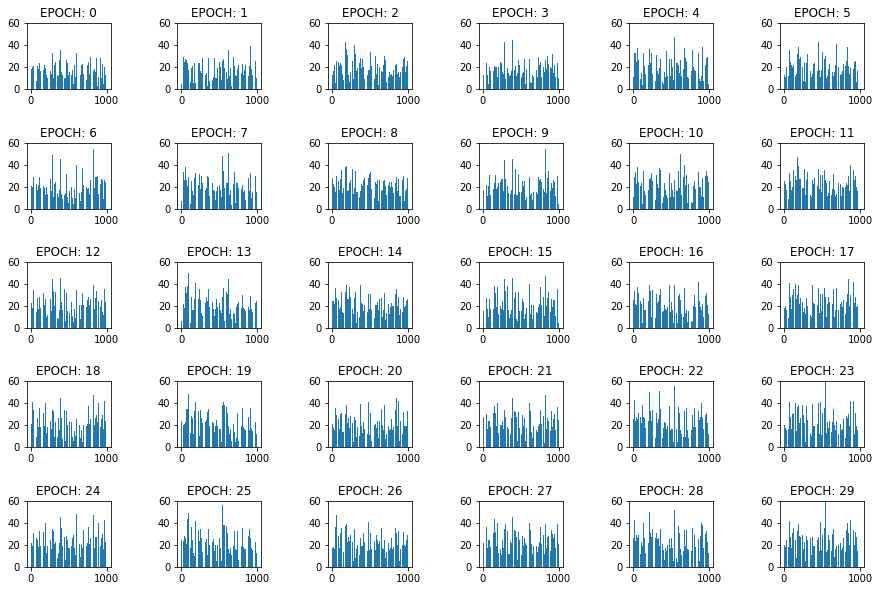

In [110]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
EPOCH = 30 
for epoch in range(0,EPOCH):
    ax = fig.add_subplot(5, 6, epoch + 1)
    path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{epoch}.csv")
    df = pd.read_csv(path_df)
    ax.bar(range(len(df['ids'])), df['RougeScore1'])
    ax.set_title(f"EPOCH: {epoch}")
    ax.set_ylim([0,60])

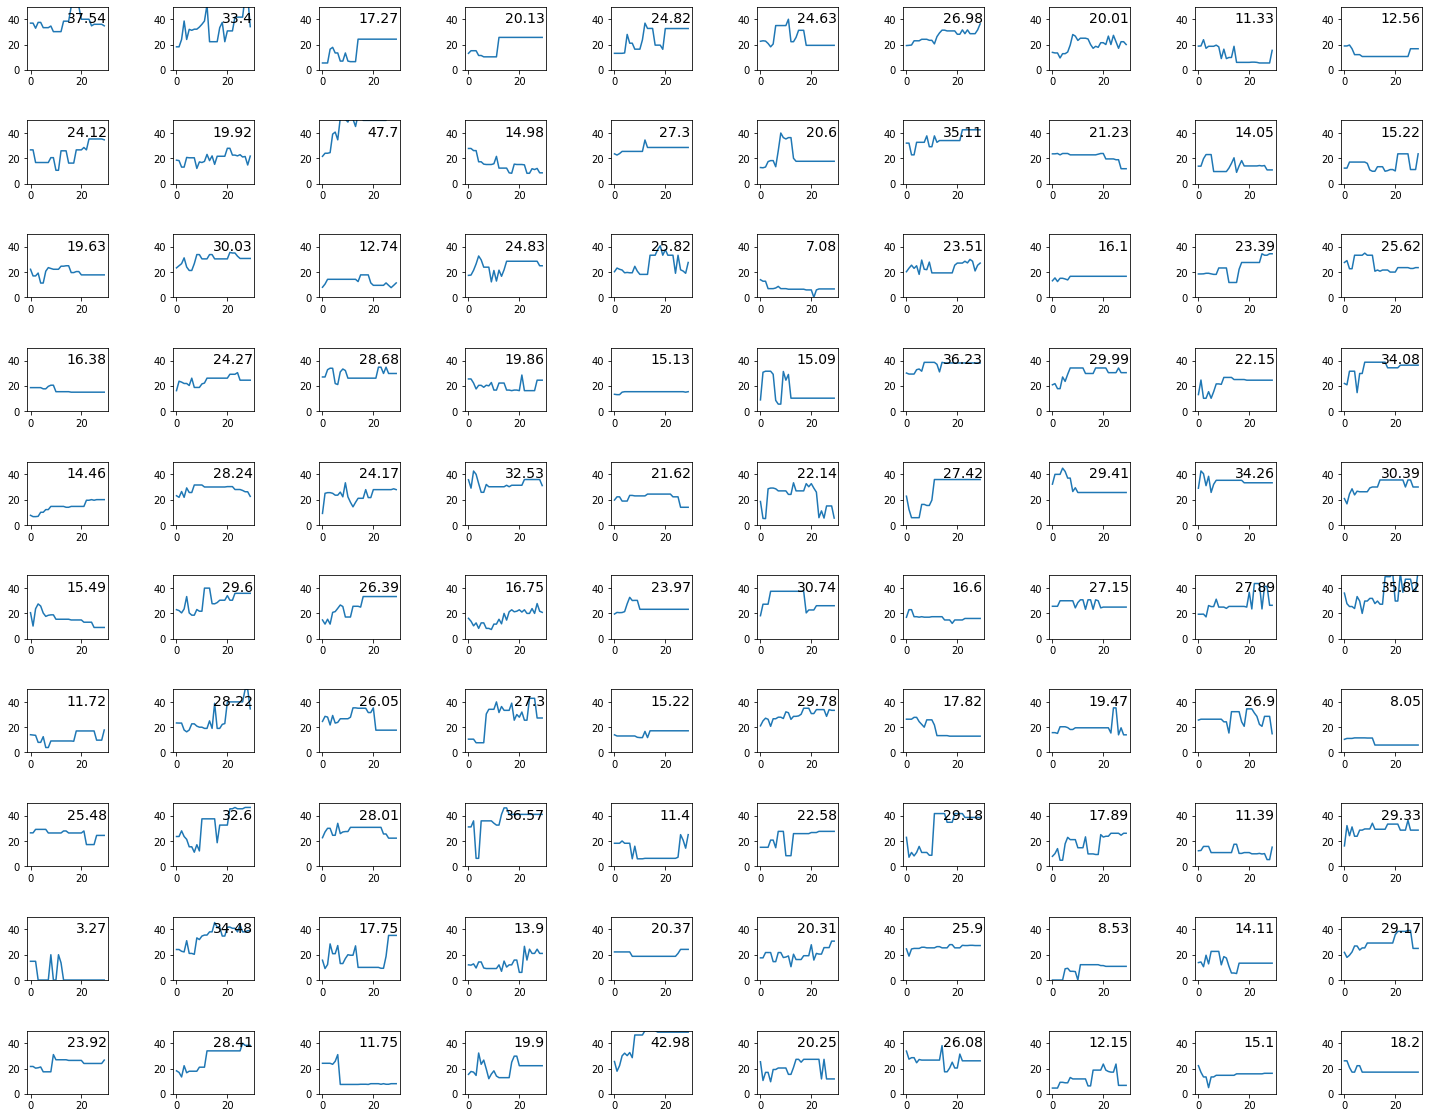

In [111]:
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

for n in range(0,100):
    ax = fig.add_subplot(10, 10, n + 1)
    scores = dev(n)
    ax.plot(scores)
    ax.text(30, 35, str(np.round(np.mean(scores),2)),
         fontsize=14, weight = 'medium', ha='right', va = 'bottom')
    ax.set_ylim([0,50])  

#### Both

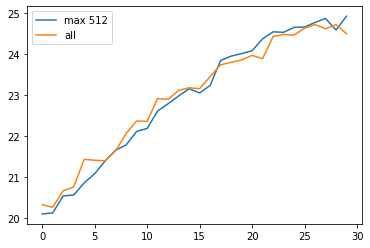

In [108]:
plt.plot(rouge1_512, label = 'max 512')
plt.plot(rouge1, label = "all")
plt.legend()